### exploration

In [1]:
import pandas as pd
import re 
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv("Mobiles Dataset (2025).csv",encoding='latin1')
df.head()
df.isna().sum().sum()
df.isna().sum()

Company Name                 0
Model Name                   0
Mobile Weight                0
RAM                          0
Front Camera                 0
Back Camera                  0
Processor                    0
Battery Capacity             0
Screen Size                  0
Launched Price (Pakistan)    0
Launched Price (India)       0
Launched Price (China)       0
Launched Price (USA)         0
Launched Price (Dubai)       0
Launched Year                0
dtype: int64

In [3]:
df = df.drop(["Launched Price (Pakistan)","Launched Price (India)"],axis=1)
df

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"CNY 5,799",USD 799,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"CNY 6,099",USD 849,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"CNY 6,499",USD 899,"AED 3,199",2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"CNY 6,199",USD 899,"AED 3,199",2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"CNY 6,499",USD 949,"AED 3,399",2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,Poco,Pad 5G 128GB,571g,8GB,8MP,8MP,Snapdragon 7s Gen 2,"10,000mAh",12.1 inches,"CNY 2,099",USD 280,"AED 1,029",2024
926,Poco,Pad 5G 256GB,571g,8GB,8MP,8MP,Snapdragon 7s Gen 2,"10,000mAh",12.1 inches,"CNY 2,299",USD 300,"AED 1,099",2024
927,Samsung,Galaxy Z Fold6 256GB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,"¥13,999","USD 1,899","AED 7,199",2024
928,Samsung,Galaxy Z Fold6 512GB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,"CNY 15,999",USD 1719,"AED 7,699",2024


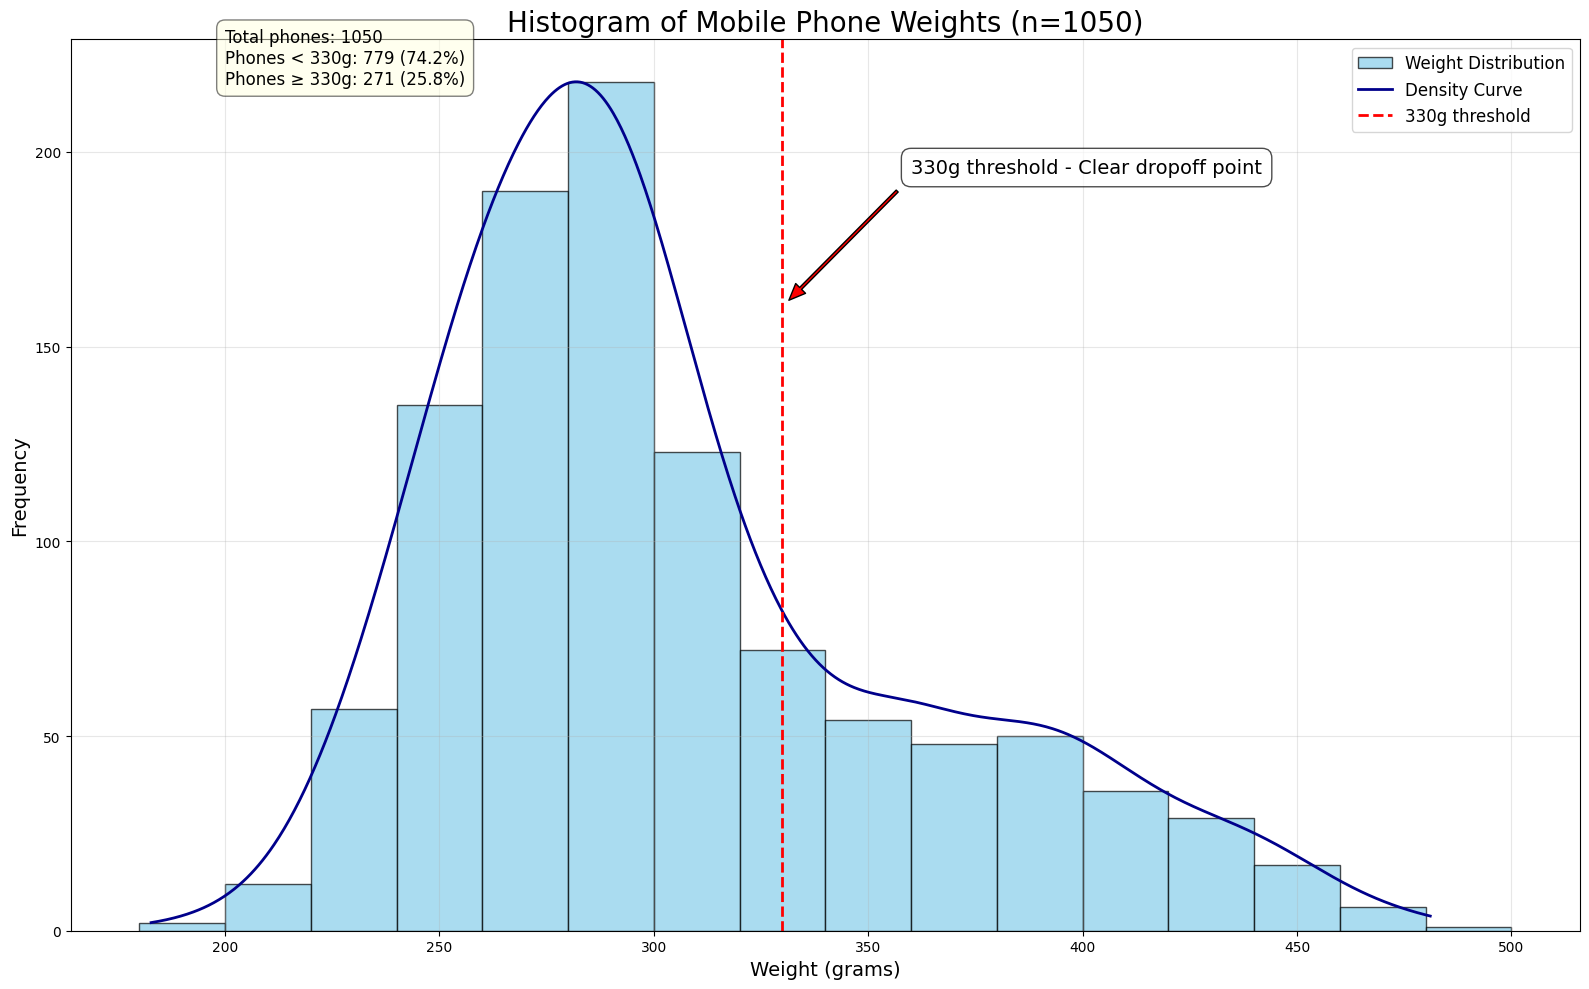

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import gaussian_kde

# Sample data creation (replace with your actual data)
np.random.seed(42)
# Create a more realistic dataset with 1000+ phones
weights_below = np.random.normal(280, 30, 800)  # Most phones below 330g
weights_above = np.random.normal(380, 40, 250)  # Fewer phones above 330g
weights = np.concatenate([weights_below, weights_above])

# Create a DataFrame - using dfx consistently throughout the code
dfx = pd.DataFrame({"Mobile Weight": weights})

# Create a more readable histogram
plt.figure(figsize=(16, 10))

# Create bins with width of 20 grams to make it more readable
bin_width = 20
min_weight = int(dfx["Mobile Weight"].min() - (dfx["Mobile Weight"].min() % bin_width))
max_weight = int(dfx["Mobile Weight"].max() + bin_width - (dfx["Mobile Weight"].max() % bin_width))
bins = range(min_weight, max_weight + bin_width, bin_width)

# Plot histogram
n, bins, patches = plt.hist(dfx["Mobile Weight"], bins=bins, 
                           color="skyblue", edgecolor="black", alpha=0.7,
                           label="Weight Distribution")

# Add KDE curve for smooth density representation
kde = gaussian_kde(dfx["Mobile Weight"])
x_vals = np.linspace(dfx["Mobile Weight"].min(), dfx["Mobile Weight"].max(), 1000)
y_vals = kde(x_vals)
# Scale KDE to match histogram height for better visualization
y_vals = y_vals * (n.max() / y_vals.max()) 
plt.plot(x_vals, y_vals, color="darkblue", linewidth=2, label="Density Curve")

# Add vertical line at 330 grams
plt.axvline(x=330, color="red", linestyle="--", linewidth=2, label="330g threshold")

# Annotate the threshold
plt.annotate("330g threshold - Clear dropoff point", 
             xy=(330, plt.gca().get_ylim()[1]*0.7),
             xytext=(360, plt.gca().get_ylim()[1]*0.85),
             arrowprops=dict(facecolor="red", shrink=0.05, width=2, headwidth=10),
             fontsize=14,
             bbox=dict(boxstyle="round,pad=0.5", facecolor="white", alpha=0.7))

# Add labels and title
plt.title(f"Histogram of Mobile Phone Weights (n={len(dfx)})", fontsize=20)
plt.xlabel("Weight (grams)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Add text describing the distribution - fixed error
below_330 = sum(dfx["Mobile Weight"] < 330)
above_330 = sum(dfx["Mobile Weight"] >= 330)
percent_below = below_330/len(dfx)*100
percent_above = above_330/len(dfx)*100

plt.text(min_weight + 20, plt.gca().get_ylim()[1]*0.95, 
         f"Total phones: {len(dfx)}\nPhones < 330g: {below_330} ({percent_below:.1f}%)\nPhones ≥ 330g: {above_330} ({percent_above:.1f}%)",
         bbox=dict(facecolor="lightyellow", alpha=0.5, boxstyle="round,pad=0.5"),
         fontsize=12)

plt.tight_layout()
plt.show()

In [5]:
df['Mobile Weight'] = pd.to_numeric(df['Mobile Weight'].str.replace('g', '', regex=False))

# Now you can calculate the median successfully
median_weight = df['Mobile Weight'].median()

print(f"The median mobile weight is: {median_weight}")

The median mobile weight is: 194.0


In [6]:
df["Mobile Weight"].mean()

np.float64(228.26709677419356)

### Preprocessing

In [7]:
# 1. Clean the column (if not already done)
if df['Mobile Weight'].dtype == 'object': # Check if it's still string/object type
    print("Cleaning 'Mobile Weight' column before filtering...")
    df['Mobile Weight'] = pd.to_numeric(df['Mobile Weight'].str.replace('g', '', regex=False), errors='coerce')
    # Optional: Handle potential NaNs if necessary, e.g.:
    # df.dropna(subset=['Mobile Weight'], inplace=True)

# 2. Perform the filtering
filtered_df = df[~(df["Mobile Weight"] > 300)]

# 3. Display the result
print("Filtered DataFrame (Mobile Weight > 330):")
print(filtered_df.max())

filtered_df

# Or in Jupyter:
# filtered_df

Filtered DataFrame (Mobile Weight > 330):
Company Name                             Xiaomi
Model Name                        iQOO 12 256GB
Mobile Weight                             295.0
RAM                                  8GB / 12GB
Front Camera                          Dual 60MP
Back Camera                           8MP + 2MP
Processor                           Unisoc T760
Battery Capacity                        6400mAh
Screen Size               8.0 inches (unfolded)
Launched Price (China)                  ¥13,999
Launched Price (USA)                    USD 999
Launched Price (Dubai)                  AED 999
Launched Year                              2025
dtype: object


,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174.0,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"CNY 5,799",USD 799,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174.0,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"CNY 6,099",USD 849,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174.0,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"CNY 6,499",USD 899,"AED 3,199",2024
3,Apple,iPhone 16 Plus 128GB,203.0,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"CNY 6,199",USD 899,"AED 3,199",2024
4,Apple,iPhone 16 Plus 256GB,203.0,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"CNY 6,499",USD 949,"AED 3,399",2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...
923,POCO,X7 Pro 256GB,207.0,8GB,20MP,108MP,MediaTek Dimensity 8400,6000mAh,6.67 inches,"CNY 2,699",USD 399,"AED 1,499",2025
924,POCO,M7 5G 128GB,198.0,6GB,8MP,50MP,MediaTek Dimensity 7025,5110mAh,6.67 inches,"CNY 1,599",USD 229,AED 899,2024
927,Samsung,Galaxy Z Fold6 256GB,239.0,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,"¥13,999","USD 1,899","AED 7,199",2024
928,Samsung,Galaxy Z Fold6 512GB,239.0,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,"CNY 15,999",USD 1719,"AED 7,699",2024


This plot shows that there might be tables in this datasets, hence the weight distribution and the diffrence of median and mean. let's explore this further. The bigger hint is that around the 400gr weight

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Assuming filtered_df is your dataframe with a 'Company Name' column
# First, map brands to regions
region_mapping = {
    "East Asia (China)": ["Xiaomi", "Huawei", "Vivo", "iQOO", "Lenovo", "POCO", "Honor", "Realme", "Tecno", "Infinix"],
    "East Asia (Other)": ["Samsung", "Sony"],
    "Western": ["Apple", "Motorola", "Nokia", "Google"]
}

# Create a new column with the region
def map_brand_to_region(brand):
    for region, brands in region_mapping.items():
        if brand in brands:
            return region
    return "Other"

filtered_df["region"] = filtered_df["Company Name"].apply(map_brand_to_region)

# Now use sklearn's OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop="first")  # drop="first" to avoid multicollinearity
region_encoded = encoder.fit_transform(filtered_df[["region"]])

# Create column names for the encoded features
region_feature_names = encoder.get_feature_names_out(["region"])

# Convert to DataFrame for easier merging
region_encoded_df = pd.DataFrame(region_encoded, columns=region_feature_names, index=filtered_df.index)

# Join with original dataframe
filtered_df = pd.concat([filtered_df, region_encoded_df], axis=1)
result = filtered_df  # Now filtered_df contains the one-hot encoded region columns

C:\Users\alper\AppData\Local\Temp\ipykernel_148384\422295168.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["region"] = filtered_df["Company Name"].apply(map_brand_to_region)


Let's create a new column named storage since it's one of the important factors that effect the price.

In [9]:
result["storage"] = result["Model Name"].str.extract(r"(\d+(?:GB|TB))")
result.nunique()

Company Name                 17
Model Name                  813
Mobile Weight               100
RAM                          10
Front Camera                 27
Back Camera                  86
Processor                   204
Battery Capacity            113
Screen Size                  72
Launched Price (China)      130
Launched Price (USA)        103
Launched Price (Dubai)      133
Launched Year                11
region                        4
region_East Asia (Other)      2
region_Other                  2
region_Western                2
storage                       7
dtype: int64

In [10]:
# One-liner for each column
result["Front Camera"] = result["Front Camera"].astype("string")
result["Back Camera"] = result["Back Camera"].astype("string")

result["Front Camera"] = result["Front Camera"].str.replace(" / 4k", "").str.replace(" + ", "").str.replace("(UDC)","").str.replace("+", "")
result["Back Camera"] = result["Back Camera"].str.replace(" / 4k", "").str.replace(" + ", "")
def process_camera_megapixels(df):
    """
    Processes the "Back Camera" column to extract and sum megapixel values.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing a "Back Camera" column
        
    Returns:
    --------
    pandas.DataFrame
        DataFrame with processed "Back Camera" column
    """
    # Create a copy to avoid modifying the original
    result = df.copy()
    
    # Define a function to extract and sum MP values
    def extract_mp_sum(camera_text):
        if pd.isna(camera_text):
            return None
            
        # Convert to string if not already
        camera_text = str(camera_text)
        
        # Extract all numbers followed by 'MP'
        import re
        mp_values = re.findall(r"(\d+)MP", camera_text)
        
        # Convert to float and sum
        if mp_values:
            return sum(float(val) for val in mp_values)
        else:
            return None
    
    # Apply the function to the "Back Camera" column
    result["Back Camera"] = result["Back Camera"].apply(extract_mp_sum)
    result["Front Camera"] = result["Front Camera"].apply(extract_mp_sum)
    
    return result

result=process_camera_megapixels(result)


columns_to_clean = [
    "Battery Capacity",
    "Launched Price (China)",
    "Launched Price (USA)",
    "Launched Price (Dubai)",
    "Screen Size"
]

# Iterative approach to clean and convert columns
for column in columns_to_clean:
    # Create a temporary series for the cleaned values
    cleaned_values = []
    
    for value in result[column]:
        if pd.isna(value):
            cleaned_values.append(value)
        else:
            # Extract all digits and decimal points
            numbers = re.sub(r"[^0-9.]", "", str(value))
            cleaned_values.append(numbers if numbers else None)
    
    # Assign the cleaned values back to the dataframe
    result[column] = cleaned_values
    
    # Convert to appropriate numeric type
    result[column] = pd.to_numeric(result[column], errors="coerce")

# Display the result
print(result[columns_to_clean].head())
result["Processor"].nunique()

   Battery Capacity  Launched Price (China)  Launched Price (USA)  \
0              3600                    5799                 799.0   
1              3600                    6099                 849.0   
2              3600                    6499                 899.0   
3              4200                    6199                 899.0   
4              4200                    6499                 949.0   

   Launched Price (Dubai)  Screen Size  
0                    2799          6.1  
1                    2999          6.1  
2                    3199          6.1  
3                    3199          6.7  
4                    3399          6.7  


204

In [11]:

# First create your DataFrame with the column names you want
df = pd.DataFrame(columns=["model", "rating", "antutu", "singlecore/multicore", "layout", "clock speed", "gpu"])

# Add the first row manually
first_row = {
    "model": "Snapdragon 8 Elite (Gen 4)\nQualcomm",
    "rating": "98\n A+",
    "antutu": 2745854,
    "singlecore/multicore": "3155 / 9723",
    "layout": "8\n (2+6)",
    "clock speed": "4320 MHz",
    "gpu": "Adreno 830"
}

# Add this row to the DataFrame
df = pd.concat([df, pd.DataFrame([first_row])], ignore_index=True)

# Continue adding other rows as needed or read the rest from your CSV
# For example, if you have the rest of the data in another CSV:
rest_of_data = pd.read_csv("processors.csv")
rest_of_data.columns = ["model", "rating", "antutu", "singlecore/multicore", "layout", "clock speed", "gpu"]
df = pd.concat([df, rest_of_data], ignore_index=True)


print(df.head())

                                  model   rating   antutu  \
0  Snapdragon 8 Elite (Gen 4)\nQualcomm  98\n A+  2745854   
1                        A18 Pro\nApple  97\n A+  1793917   
2                      Apple A18\nApple  95\n A+  1622118   
3         Dimensity 9400 Plus\nMediaTek  98\n A+  2651570   
4              Dimensity 9400\nMediaTek  95\n A+  2605867   

  singlecore/multicore       layout clock speed                gpu  
0          3155 / 9723    8\n (2+6)    4320 MHz         Adreno 830  
1          3582 / 9089    6\n (2+4)    4050 MHz  Apple A18 Pro GPU  
2          3466 / 8592    6\n (2+4)    4050 MHz      Apple A18 GPU  
3          2927 / 9000  8\n (1+3+4)    3730 MHz     Mali-G925 MP12  
4          2874 / 8969  8\n (1+3+4)    3630 MHz     Mali-G925 MP12  


todo: "fix" the names in order to match it with the other csv

todo: fix column layout so that there's only one value

todo: check if the processor names are 1:1


In [12]:
companies_to_remove = ["Unisoc", "Samsung", "Apple", "Qualcomm", "HiSilicon", "Google", "MediaTek"]

# Function to clean the model names
def clean_model_name(model_str):
    if pd.isna(model_str):
        return model_str
    
    # Create a case-insensitive pattern for each company
    for company in companies_to_remove:
        # Use case-insensitive replacement
        model_str = model_str.replace(company, "").strip()
        # Also try with lowercase
        model_str = model_str.replace(company.lower(), "").strip()
    
    # Remove any double spaces that might have been created
    while "  " in model_str:
        model_str = model_str.replace("  ", " ")
    
    return model_str.strip()

# Apply the cleaning function to the model column
df["model"] = df["model"].apply(clean_model_name)
df

,model,rating,antutu,singlecore/multicore,layout,clock speed,gpu
0,Snapdragon 8 Elite (Gen 4),98\n A+,2745854,3155 / 9723,8\n (2+6),4320 MHz,Adreno 830
1,A18 Pro,97\n A+,1793917,3582 / 9089,6\n (2+4),4050 MHz,Apple A18 Pro GPU
2,A18,95\n A+,1622118,3466 / 8592,6\n (2+4),4050 MHz,Apple A18 GPU
3,Dimensity 9400 Plus,98\n A+,2651570,2927 / 9000,8\n (1+3+4),3730 MHz,Mali-G925 MP12
4,Dimensity 9400,95\n A+,2605867,2874 / 8969,8\n (1+3+4),3630 MHz,Mali-G925 MP12
...,...,...,...,...,...,...,...
199,Exynos 7870,17\n D,144731,172 / 492,8\n (8),1600 MHz,Mali-T830 MP1
200,Snapdragon 801,13\n D,125245,205 / 698,4\n (4),2500 MHz,Adreno 330
201,Snapdragon 435,12\n D,117378,141 / 618,8\n (8),1400 MHz,Adreno 505
202,Snapdragon 425,12\n D,135474,130 / 488,4\n (4),1400 MHz,Adreno 308


In [13]:
df["multicore"] = df["singlecore/multicore"].str.split("/").str[1].str.strip()

# Step 2: Convert the extracted values to numeric type
df["multicore"] = pd.to_numeric(df["multicore"])

# Step 3: Drop the original column if you don't need it anymore
df = df.drop("singlecore/multicore", axis=1)


In [14]:
df.head()

,model,rating,antutu,layout,clock speed,gpu,multicore
0,Snapdragon 8 Elite (Gen 4),98\n A+,2745854,8\n (2+6),4320 MHz,Adreno 830,9723
1,A18 Pro,97\n A+,1793917,6\n (2+4),4050 MHz,Apple A18 Pro GPU,9089
2,A18,95\n A+,1622118,6\n (2+4),4050 MHz,Apple A18 GPU,8592
3,Dimensity 9400 Plus,98\n A+,2651570,8\n (1+3+4),3730 MHz,Mali-G925 MP12,9000
4,Dimensity 9400,95\n A+,2605867,8\n (1+3+4),3630 MHz,Mali-G925 MP12,8969


Deleting brand names so that they match with the previous dataframe

In [15]:
columns_to_drop = [
    "clock speed",
    "layout",    
    "rating",
    "antutu",
    "gpu"
]

df = df.drop(columns=columns_to_drop)


In [16]:
df

,model,multicore
0,Snapdragon 8 Elite (Gen 4),9723
1,A18 Pro,9089
2,A18,8592
3,Dimensity 9400 Plus,9000
4,Dimensity 9400,8969
...,...,...
199,Exynos 7870,492
200,Snapdragon 801,698
201,Snapdragon 435,618
202,Snapdragon 425,488


Matching by processor names and writing the multicore benchmarks instead

In [17]:
# First, create a mapping dictionary from processor model to multicore score
processor_to_score = dict(zip(df["model"], df["multicore"]))

# Now create a function to map processor names to scores
def map_processor_to_score(processor_name):
    # Loop through processor models and check if any are in the processor_name
    for processor, score in processor_to_score.items():
        if processor in processor_name:
            return score
    return None  # Return None if no match found

# Apply the mapping function to the processor column in the second dataframe
# Assuming the processor column in df2 is named "processor"
result["processor_score"] = result["Processor"].apply(map_processor_to_score)

In [18]:
result= result.drop("Processor",axis=1)
result

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Battery Capacity,Screen Size,Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year,region,region_East Asia (Other),region_Other,region_Western,storage,processor_score
0,Apple,iPhone 16 128GB,174.0,6GB,12.0,48.0,3600,6.10,5799,799.0,2799,2024,Western,0.0,0.0,1.0,128GB,NaN
1,Apple,iPhone 16 256GB,174.0,6GB,12.0,48.0,3600,6.10,6099,849.0,2999,2024,Western,0.0,0.0,1.0,256GB,NaN
2,Apple,iPhone 16 512GB,174.0,6GB,12.0,48.0,3600,6.10,6499,899.0,3199,2024,Western,0.0,0.0,1.0,512GB,NaN
3,Apple,iPhone 16 Plus 128GB,203.0,6GB,12.0,48.0,4200,6.70,6199,899.0,3199,2024,Western,0.0,0.0,1.0,128GB,NaN
4,Apple,iPhone 16 Plus 256GB,203.0,6GB,12.0,48.0,4200,6.70,6499,949.0,3399,2024,Western,0.0,0.0,1.0,256GB,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923,POCO,X7 Pro 256GB,207.0,8GB,20.0,108.0,6000,6.67,2699,399.0,1499,2025,East Asia (China),0.0,0.0,0.0,256GB,6033.0
924,POCO,M7 5G 128GB,198.0,6GB,8.0,50.0,5110,6.67,1599,229.0,899,2024,East Asia (China),0.0,0.0,0.0,128GB,2472.0
927,Samsung,Galaxy Z Fold6 256GB,239.0,12GB,14.0,50.0,4400,7.60,13999,1899.0,7199,2024,East Asia (Other),1.0,0.0,0.0,256GB,7304.0
928,Samsung,Galaxy Z Fold6 512GB,239.0,12GB,14.0,50.0,4400,7.60,15999,1719.0,7699,2024,East Asia (Other),1.0,0.0,0.0,512GB,7304.0


200MP (Main)8MP (Ultra-wide)2MP (Macro)

In [19]:
result

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Battery Capacity,Screen Size,Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year,region,region_East Asia (Other),region_Other,region_Western,storage,processor_score
0,Apple,iPhone 16 128GB,174.0,6GB,12.0,48.0,3600,6.10,5799,799.0,2799,2024,Western,0.0,0.0,1.0,128GB,NaN
1,Apple,iPhone 16 256GB,174.0,6GB,12.0,48.0,3600,6.10,6099,849.0,2999,2024,Western,0.0,0.0,1.0,256GB,NaN
2,Apple,iPhone 16 512GB,174.0,6GB,12.0,48.0,3600,6.10,6499,899.0,3199,2024,Western,0.0,0.0,1.0,512GB,NaN
3,Apple,iPhone 16 Plus 128GB,203.0,6GB,12.0,48.0,4200,6.70,6199,899.0,3199,2024,Western,0.0,0.0,1.0,128GB,NaN
4,Apple,iPhone 16 Plus 256GB,203.0,6GB,12.0,48.0,4200,6.70,6499,949.0,3399,2024,Western,0.0,0.0,1.0,256GB,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923,POCO,X7 Pro 256GB,207.0,8GB,20.0,108.0,6000,6.67,2699,399.0,1499,2025,East Asia (China),0.0,0.0,0.0,256GB,6033.0
924,POCO,M7 5G 128GB,198.0,6GB,8.0,50.0,5110,6.67,1599,229.0,899,2024,East Asia (China),0.0,0.0,0.0,128GB,2472.0
927,Samsung,Galaxy Z Fold6 256GB,239.0,12GB,14.0,50.0,4400,7.60,13999,1899.0,7199,2024,East Asia (Other),1.0,0.0,0.0,256GB,7304.0
928,Samsung,Galaxy Z Fold6 512GB,239.0,12GB,14.0,50.0,4400,7.60,15999,1719.0,7699,2024,East Asia (Other),1.0,0.0,0.0,512GB,7304.0


Clock speed, core layout, rating, antutu benchmarks (they're depending on the antutu version), gpu

In [20]:
#clean ram
# First check if these columns exist
if "RAM" in result.columns:
    # Convert to string type first
    result["RAM"] = result["RAM"].astype(str)
    result["RAM"] = result["RAM"].str.replace("GB", "", regex=False)
    result["RAM"] = result["RAM"].str.replace("8 / 12", "8", regex=False)
    
    # Convert to numeric if needed
    result["RAM"] = pd.to_numeric(result["RAM"], errors="coerce")

if "Battery Capacity" in result.columns:
    # Convert to string type first
    result["Battery Capacity"] = result["Battery Capacity"].astype(str)
    result["Battery Capacity"] = result["Battery Capacity"].str.replace(r"[^\d]", "", regex=True)
    
    # Convert to numeric if needed
    result["Battery Capacity"] = pd.to_numeric(result["Battery Capacity"], errors="coerce")
    

In [21]:
# Process Storage column if it exists
if "storage" in result.columns:
    # Convert to string type first
    result["storage"] = result["storage"].astype(str)
    
    # Remove "GB" from values
    result["storage"] = result["storage"].str.replace("GB", "", regex=False)
    
    # Handle other potential variants
    result["storage"] = result["storage"].str.replace(" ", "", regex=False)  # Remove spaces
    
    # Convert to numeric if needed - use errors="coerce" to handle any non-numeric values
    result["storage"] = pd.to_numeric(result["storage"], errors="coerce")

In [22]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 829 entries, 0 to 929
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Company Name              829 non-null    object 
 1   Model Name                829 non-null    object 
 2   Mobile Weight             829 non-null    float64
 3   RAM                       829 non-null    int64  
 4   Front Camera              829 non-null    float64
 5   Back Camera               829 non-null    float64
 6   Battery Capacity          829 non-null    int64  
 7   Screen Size               825 non-null    float64
 8   Launched Price (China)    829 non-null    int64  
 9   Launched Price (USA)      829 non-null    float64
 10  Launched Price (Dubai)    829 non-null    int64  
 11  Launched Year             829 non-null    int64  
 12  region                    829 non-null    object 
 13  region_East Asia (Other)  829 non-null    float64
 14  region_Other   

In [23]:
result

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Battery Capacity,Screen Size,Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year,region,region_East Asia (Other),region_Other,region_Western,storage,processor_score
0,Apple,iPhone 16 128GB,174.0,6,12.0,48.0,3600,6.10,5799,799.0,2799,2024,Western,0.0,0.0,1.0,128.0,NaN
1,Apple,iPhone 16 256GB,174.0,6,12.0,48.0,3600,6.10,6099,849.0,2999,2024,Western,0.0,0.0,1.0,256.0,NaN
2,Apple,iPhone 16 512GB,174.0,6,12.0,48.0,3600,6.10,6499,899.0,3199,2024,Western,0.0,0.0,1.0,512.0,NaN
3,Apple,iPhone 16 Plus 128GB,203.0,6,12.0,48.0,4200,6.70,6199,899.0,3199,2024,Western,0.0,0.0,1.0,128.0,NaN
4,Apple,iPhone 16 Plus 256GB,203.0,6,12.0,48.0,4200,6.70,6499,949.0,3399,2024,Western,0.0,0.0,1.0,256.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923,POCO,X7 Pro 256GB,207.0,8,20.0,108.0,6000,6.67,2699,399.0,1499,2025,East Asia (China),0.0,0.0,0.0,256.0,6033.0
924,POCO,M7 5G 128GB,198.0,6,8.0,50.0,5110,6.67,1599,229.0,899,2024,East Asia (China),0.0,0.0,0.0,128.0,2472.0
927,Samsung,Galaxy Z Fold6 256GB,239.0,12,14.0,50.0,4400,7.60,13999,1899.0,7199,2024,East Asia (Other),1.0,0.0,0.0,256.0,7304.0
928,Samsung,Galaxy Z Fold6 512GB,239.0,12,14.0,50.0,4400,7.60,15999,1719.0,7699,2024,East Asia (Other),1.0,0.0,0.0,512.0,7304.0


In [24]:
result.to_csv("result.csv")

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Veri setini oku
df = pd.read_csv("Mobiles Dataset (2025).csv", encoding='latin1')

# Sütun adlarındaki boşlukları temizle
df.columns = df.columns.str.strip()

# Hedef sütunu temizle: 'Launched Price (USA)' -> 'USD 699' gibi değerleri float'a çevir
df['Launched Price (USA)'] = (
    df['Launched Price (USA)']
    .astype(str)
    .str.replace('USD', '', regex=False)
    .str.replace(',', '')
    .str.strip()
    .astype(float)
)

# Hedef sütun
target_column = 'Launched Price (USA)'

# Girdi ve hedef veriyi ayır
X = df.drop(columns=[target_column])
y = df[target_column]

# Eksik verileri çıkar
X = X.dropna()
y = y.loc[X.index]  # Aynı satırlar

# Sayısal ve kategorik sütunları ayır
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Kategorik veriler için OneHotEncoder
preprocessor = ColumnTransformer([
    ('num', 'passthrough', numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

# Pipeline: Ön işleme + Linear Regression
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('regression', LinearRegression())
])

# Eğitim/test verisini ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli eğit
pipeline.fit(X_train, y_train)

# Tahmin yap
y_pred = pipeline.predict(X_test)

# Performans metrikleri
print("📊 Model Performansı:")
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


📊 Model Performansı:
R² Score: -2.8468388872539445
MAE: 295.99831827439255
RMSE: 816.0052979458392


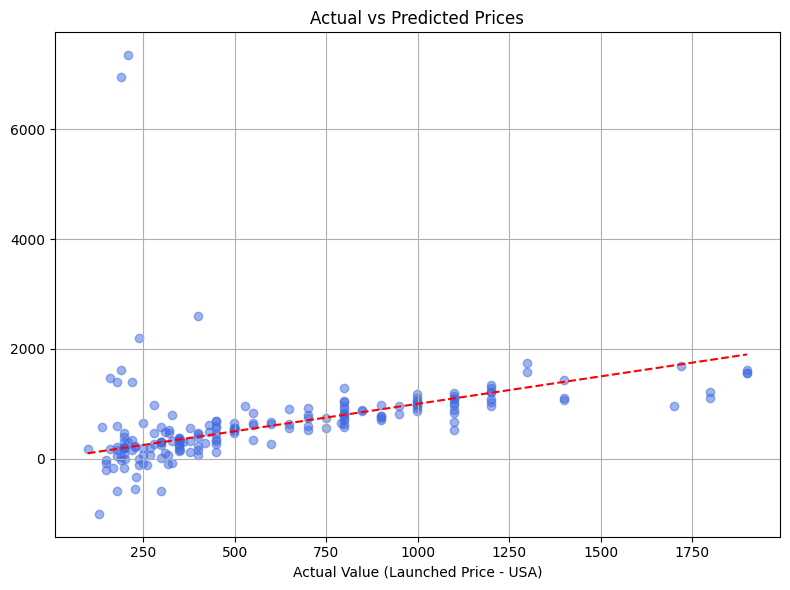

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Doğru tahmin çizgisi

plt.xlabel("Actual Value (Launched Price - USA)")
plt.title("Actual vs Predicted Prices")
plt.grid(True)
plt.tight_layout()
plt.show()
